<a href="https://colab.research.google.com/github/18K41A05B4/NLP/blob/main/18K41A05B4_NLP_ASSIGNMENT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
st='''A paragraph is a series of sentences that are organized and coherent, and are 
all  related  to  a  single  topic.  Almost  every  piece  of  writing  you  do  that  is 
longer  than  a  few  sentences  should  be  organized  into  paragraphs.  This  is 
because paragraphs show a reader where the subdivisions of an essay begin 
and end, and thus help the reader see the organization of the essay and grasp 
its main points.
Paragraphs  can  contain  many  different  kinds  of  information.  A  paragraph 
could  contain  a  series  of  brief  examples  or  a  single  long  illustration  of  a 
general  point.  It  might  describe  a  place,  character,  or  process;  narrate  a 
series of events; compare or contrast two or more things; classify items into 
categories;  or  describe  causes  and  effects.  Regardless  of  the  kind  of 
information they contain, all paragraphs share certain characteristics. One 
of the most important of these is a topic sentence.'''
print(st)

A paragraph is a series of sentences that are organized and coherent, and are 
all  related  to  a  single  topic.  Almost  every  piece  of  writing  you  do  that  is 
longer  than  a  few  sentences  should  be  organized  into  paragraphs.  This  is 
because paragraphs show a reader where the subdivisions of an essay begin 
and end, and thus help the reader see the organization of the essay and grasp 
its main points.
Paragraphs  can  contain  many  different  kinds  of  information.  A  paragraph 
could  contain  a  series  of  brief  examples  or  a  single  long  illustration  of  a 
general  point.  It  might  describe  a  place,  character,  or  process;  narrate  a 
series of events; compare or contrast two or more things; classify items into 
categories;  or  describe  causes  and  effects.  Regardless  of  the  kind  of 
information they contain, all paragraphs share certain characteristics. One 
of the most important of these is a topic sentence.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

1. Convert the above paragraph into vectors using:
i) Word2vec
ii) USE
iii)ELMO
iv) GP2
v) Sentence-BERT

In [16]:
import numpy as np
import nltk
import re
import gensim
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from gensim import corpora,models,similarities
from nltk.tokenize import PunktSentenceTokenizer


In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
#WORD2VEC
def essay_to_sentences(paragraph):
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(paragraph.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append((raw_sentence))
    return sentences

sentences=essay_to_sentences(st)

sentences

['A paragraph is a series of sentences that are organized and coherent, and are \nall  related  to  a  single  topic.',
 'Almost  every  piece  of  writing  you  do  that  is \nlonger  than  a  few  sentences  should  be  organized  into  paragraphs.',
 'This  is \nbecause paragraphs show a reader where the subdivisions of an essay begin \nand end, and thus help the reader see the organization of the essay and grasp \nits main points.',
 'Paragraphs  can  contain  many  different  kinds  of  information.',
 'A  paragraph \ncould  contain  a  series  of  brief  examples  or  a  single  long  illustration  of  a \ngeneral  point.',
 'It  might  describe  a  place,  character,  or  process;  narrate  a \nseries of events; compare or contrast two or more things; classify items into \ncategories;  or  describe  causes  and  effects.',
 'Regardless  of  the  kind  of \ninformation they contain, all paragraphs share certain characteristics.',
 'One \nof the most important of these is a topic 

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
wordvecs=[nltk.word_tokenize(sent) for sent in sentences]
from nltk.corpus import stopwords
stops=list(set(stopwords.words("english")))


for i in wordvecs:
  for j in i:
    if j in stops:
      i.remove(j)
    elif len(j)==1:
      i.remove(j)

model=gensim.models.Word2Vec(wordvecs,min_count=1,size=32)

In [8]:
 model['paragraph']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.00973939,  0.00649113,  0.00968571,  0.00741662,  0.00629558,
        0.00599612, -0.00761698,  0.01465133,  0.01211265,  0.00767194,
       -0.00076838, -0.01303948,  0.01381567, -0.00512995, -0.00726375,
       -0.00921236, -0.00909816, -0.0025648 ,  0.01395473,  0.01537792,
        0.01205905, -0.01397169,  0.00810246, -0.01405799,  0.01275978,
       -0.00790994,  0.01099181,  0.00278291,  0.00721936,  0.01350342,
       -0.00523822, -0.01344744], dtype=float32)

In [9]:
model.most_similar('sentence')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('and', 0.4733531177043915),
 ('every', 0.3228517770767212),
 ('organization', 0.32138270139694214),
 ('Paragraphs', 0.3095344305038452),
 ('main', 0.2913876473903656),
 ('more', 0.26141101121902466),
 ('character', 0.25641685724258423),
 ('see', 0.23692134022712708),
 ('thus', 0.2324284017086029),
 ('single', 0.22846558690071106)]

**USE**

In [10]:
import tensorflow_hub as hub
use= hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings=use(sentences)
print(embeddings)

tf.Tensor(
[[ 0.01419854 -0.01116286  0.06808718 ... -0.08247866 -0.02446434
   0.05483037]
 [ 0.02902018 -0.00415597  0.07664446 ... -0.06830524 -0.00835191
   0.04397805]
 [ 0.06417768 -0.01383496  0.05436629 ... -0.06510986  0.03140234
   0.05601776]
 ...
 [ 0.03035337 -0.04422743  0.05888064 ... -0.06469322  0.03180374
   0.06408841]
 [ 0.0167906   0.00667928  0.01125342 ... -0.01703941  0.00186954
   0.03127917]
 [ 0.00255486 -0.05832284  0.01486255 ... -0.09906971 -0.07840379
   0.06731212]], shape=(8, 512), dtype=float32)


In [11]:
print("shape= ",embeddings[0].shape)
print("The sentence: ",sentences[0],"\n is converted as : \n{}".format(embeddings[0]))

shape=  (512,)
The sentence:  A paragraph is a series of sentences that are organized and coherent, and are 
all  related  to  a  single  topic. 
 is converted as : 
[ 0.01419854 -0.01116286  0.06808718  0.07700881 -0.03895407  0.027068
  0.00257173  0.02014753 -0.03788976  0.04260812 -0.01521275  0.00533997
 -0.07209948  0.0367611  -0.06254542 -0.09687163 -0.01923382  0.05190525
 -0.09006073 -0.05622269  0.01608456  0.06809609 -0.01020567  0.03836553
 -0.00381103  0.02741722 -0.04025005 -0.06196541 -0.01051786 -0.02963339
  0.08044114 -0.01431125  0.01068422  0.00968601 -0.07914273  0.03594946
  0.05300874  0.01727414  0.01145495  0.03765574 -0.01705824  0.0573004
  0.03334488  0.05453339  0.0676109   0.00181276  0.00020469 -0.0520896
 -0.02940499  0.0181704   0.01051127  0.0668782   0.00589057 -0.02306652
 -0.015832   -0.02011859 -0.0044348   0.05842008  0.02924796  0.01362076
 -0.03265018 -0.05013916  0.05568229  0.05168435  0.04828951  0.03396421
  0.04861676 -0.02090659  0.0573265

In [ ]:
#IMPLEMENTING ELMO

**ELMO**

In [15]:
import tensorflow_hub as hub
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
elmo=hub.Module("https://tfhub.dev/google/elmo/3",trainable=True)
embeddings=elmo(
    sentences,
    signature="default",
    as_dict=True)["elmo"]
init=tf.initialize_all_variables()
sess=tf.Session()
sess.run(init)
print("\n\n")
print(sess.run(embeddings[0]))
print("shape=",embeddings[0].shape)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.





[[ 0.29286996 -0.14378002 -0.32574052 ... -0.42214906 -0.26807797
  -0.06121337]
 [-0.59441644  0.09640661  0.50537676 ...  0.2956011   0.36285305
   0.46462518]
 [-0.17083307 -0.18744141 -0.27626717 ... -0.6752867   0.36227596
   0.7219782 ]
 ...
 [-0.02840841 -0.04353216  0.04130163 ...  0.02583168 -0.01429836
  -0.01650422]
 [-0.02840841 -0.04353216  0.04130163 ...  0.02583168 -0.01429836
  -0.01650422]
 [-0.02840841 -0.04353216  0.04130163 ...  0.02583168 -0.01429836
  -0.01650422]]
shape= (32, 1024)


**IMPLEMENTING GP2**

In [17]:

!pip install transformers


     |████████████████████████████████| 3.1 MB 5.2 MB/s 
     |████████████████████████████████| 59 kB 4.5 MB/s 
     |████████████████████████████████| 596 kB 51.8 MB/s 
     |████████████████████████████████| 3.3 MB 35.6 MB/s 
     |████████████████████████████████| 895 kB 529 kB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
import torch
import transformers

In [5]:
gptokenizer=transformers.GPT2Tokenizer.from_pretrained('gpt2-large')
model=transformers.GPT2LMHeadModel.from_pretrained('gpt2-large')
output=gptokenizer.encode(st,add_special_tokens=False,return_tensors="pt")

In [6]:
print("shape=",output.shape)
output

shape= torch.Size([1, 264])


tensor([[   32,  7322,   318,   257,  2168,   286, 13439,   326,   389,  8389,
           290, 24870,    11,   290,   389,   220,   198,   439,   220,  3519,
           220,   284,   220,   257,   220,  2060,   220,  7243,    13,   220,
         16699,   220,   790,   220,  3704,   220,   286,   220,  3597,   220,
           345,   220,   466,   220,   326,   220,   318,   220,   198,  6511,
           263,   220,   621,   220,   257,   220,  1178,   220, 13439,   220,
           815,   220,   307,   220,  8389,   220,   656,   220, 23549,    13,
           220,   770,   220,   318,   220,   198, 13893, 23549,   905,   257,
          9173,   810,   262, 45944,  3279,   286,   281, 14268,  2221,   220,
           198,   392,   886,    11,   290,  4145,  1037,   262,  9173,   766,
           262,  4009,   286,   262, 14268,   290, 13180,   220,   198,   896,
          1388,  2173,    13,   198, 10044,  6111,    82,   220,   460,   220,
          3994,   220,   867,   220,  1180,   220,  

**SENTENCE  BERT
**

In [12]:
bert = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim128/2")
embeddings2=bert(sentences)
print(embeddings2)

tf.Tensor(
[[ 0.51884556  0.02918336  0.07145058 ...  0.22533715  0.01950222
  -0.1289025 ]
 [ 0.5166956   0.00863559  0.13047293 ...  0.06873029  0.04432377
   0.02298209]
 [ 0.6110389   0.1811815  -0.11061911 ... -0.09788384  0.09358283
   0.07447077]
 ...
 [ 0.39123687 -0.01085754  0.07607286 ...  0.07567259 -0.1484504
  -0.02365224]
 [ 0.24070688 -0.00535227  0.12521958 ... -0.1306146  -0.12194312
   0.00996622]
 [ 0.3799187  -0.05745781  0.09742597 ...  0.0461409  -0.07855327
   0.03973798]], shape=(8, 128), dtype=float32)


In [13]:
print("shape=",embeddings2[0].shape)
print("The sentence: ",sentences[0],"\n is converted as : \n{}".format(embeddings2[0]))

shape= (128,)
The sentence:  A paragraph is a series of sentences that are organized and coherent, and are 
all  related  to  a  single  topic. 
 is converted as : 
[ 0.51884556  0.02918336  0.07145058  0.04535037 -0.04259718 -0.1654925
 -0.103632   -0.0106116  -0.19418633  0.18560012  0.05228718 -0.1996645
 -0.08536236  0.03365118 -0.14633818 -0.02451333 -0.07473224  0.0438432
 -0.18141116  0.1372393   0.0136739   0.07080507 -0.00786687 -0.08535285
  0.0715998  -0.06499769 -0.08562539 -0.02720456 -0.05636027 -0.00261944
 -0.01944907 -0.04633158 -0.07786479 -0.16420066 -0.03604371 -0.09477271
  0.05015939 -0.10466915 -0.07002265  0.0187032   0.09759199 -0.08157597
  0.20161884  0.01257148 -0.06885625  0.21009818 -0.01509479 -0.13517898
 -0.09388355  0.01013749 -0.02629396 -0.06578662  0.04543499  0.04652723
  0.10455509  0.05183478  0.10705721 -0.10057095  0.07927544 -0.14144531
 -0.10567372 -0.08833035 -0.07270256 -0.05692196  0.0400563  -0.19360085
 -0.14046225 -0.01617921  0.1345623

2.**Find named entities (NER) for the above paragraph?**

In [8]:
import spacy
from spacy import displacy
ner=spacy.load('en')
result=ner(st)

for word in result.ents:
  print(word.text,word.label_)

two CARDINAL
One CARDINAL


In [9]:
spacy.explain('GPE')

'Countries, cities, states'

In [10]:
displacy.render(result,style="ent",jupyter=True)

**3.Find similar sentences(repeated sentences) from the above paragraph?**

In [11]:
pip install -U sentence-transformers

     |████████████████████████████████| 78 kB 3.0 MB/s 
     |████████████████████████████████| 1.2 MB 17.6 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=56c4512be521a52fade5abe3ebf2fe446aa817d1cdda87d60f8fbe82ecd42109
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers


In [12]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [19]:
se_embeddings = sbert_model.encode(sentences)
q1_vec= sbert_model.encode(sentences[0])
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))
for sent in sentences:
  si = cosine(q1_vec, sbert_model.encode([sent])[0])
  if si>0.6:
    print("Sentence1 =",sentences[0],"\n \nSentence2=", sent, "\n\nsimilarity = ", si,end="\n ----------------------------- \n")

Sentence1 = A paragraph is a series of sentences that are organized and coherent, and are 
all  related  to  a  single  topic. 
 
Sentence2= A paragraph is a series of sentences that are organized and coherent, and are 
all  related  to  a  single  topic. 

similarity =  1.0
 ----------------------------- 
Sentence1 = A paragraph is a series of sentences that are organized and coherent, and are 
all  related  to  a  single  topic. 
 
Sentence2= Almost  every  piece  of  writing  you  do  that  is 
longer  than  a  few  sentences  should  be  organized  into  paragraphs. 

similarity =  0.64775366
 ----------------------------- 
Sentence1 = A paragraph is a series of sentences that are organized and coherent, and are 
all  related  to  a  single  topic. 
 
Sentence2= A  paragraph 
could  contain  a  series  of  brief  examples  or  a  single  long  illustration  of  a 
general  point. 

similarity =  0.6927288
 ----------------------------- 
Sentence1 = A paragraph is a series of senten

4.**Explain POS tagging with HMM?**

Parts of Speech Tagging (POS) </i> : reading a sentence and being able to identify what words act as nouns, pronouns, verbs, adverbs, and so on. All these are referred to as the part of speech tags.
  According to Wikipedia, part-of-speech tagging (POS tagging or PoS tagging or POST), also called grammatical tagging or word-category disambiguation, is the process of marking up a word in a text as corresponding to a particular part of speech, based on both its definition and its context i.e. its relationship with adjacent and related words in a phrase, sentence, or paragraph.
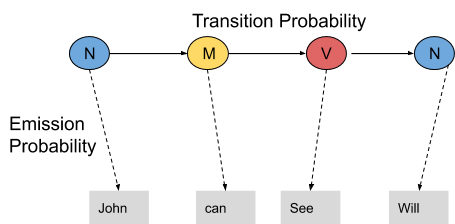
In this example, we consider only 3 POS tags that are noun, model and verb. Let the sentence “ Ted will spot Will ” be tagged as noun, model, verb and a noun and to calculate the probability associated with this particular sequence of tags we require their Transition probability and Emission probability.

The transition probability is the likelihood of a particular sequence for example, how likely is that a noun is followed by a model and a model by a verb and a verb by a noun. This probability is known as Transition probability. It should be high for a particular sequence to be correct.

Now, what is the probability that the word Ted is a noun, will is a model, spot is a verb and Will is a noun. These sets of probabilities are Emission probabilities and should be high for our tagging to be likely.
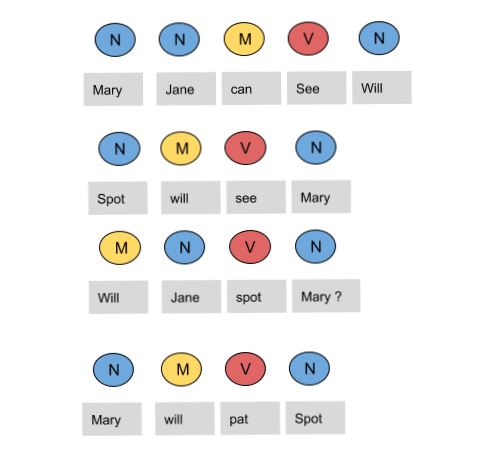
n the above sentences, the word Mary appears four times as a noun. and see appears two times as a verb. we need to calculate the probabilitiy of a word appearing as noun, verb or model. to do this, we need to calculate the emission probabilities, which represented using below table.
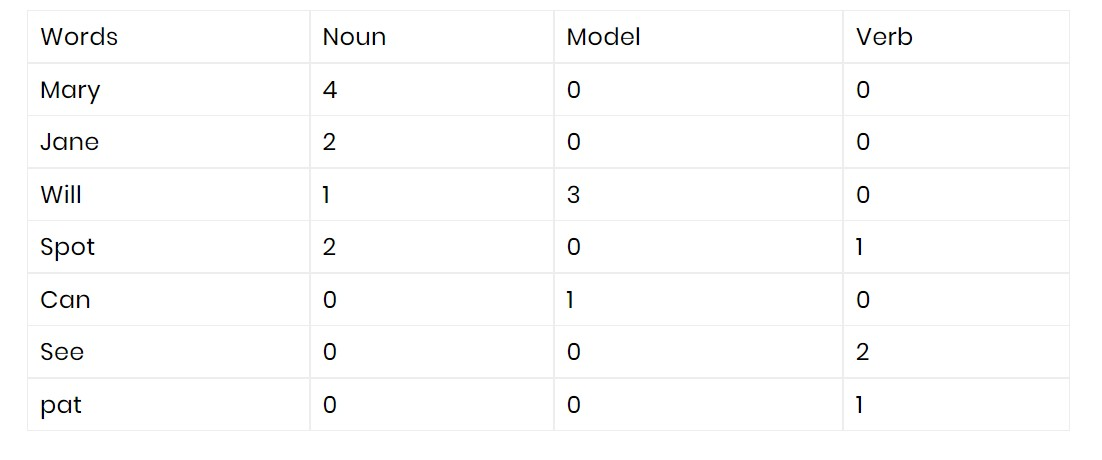
From the above table, we can conclude that

The probability that Mary is Noun = 4/9

The probability that Mary is Model = 0

The probability that Mary is Verb = 0

The probability that Will is Noun = 1/9

The probability that Will is Model = 3/4

In a similar manner, we can analyze rest of the probabilities. These are the emission probabilities.

Next, we have to calculate the transition probabilities, so define two more tags < S > and < E >. < S > is placed at the beginning of each sentence and < E > at the end as shown in the figure below.

since for first and last word there is no previous and next words, so we are adding extra dummy words. i.e < E > and < S >
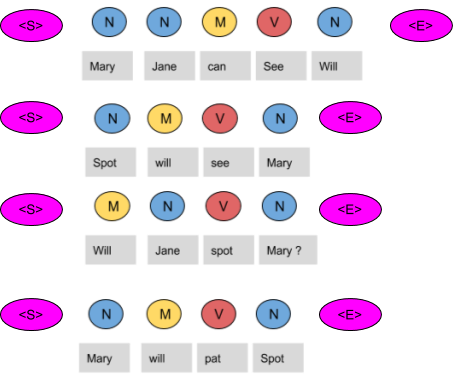
now we need to create a table and fill it with the co-occurrence counts of the tags.
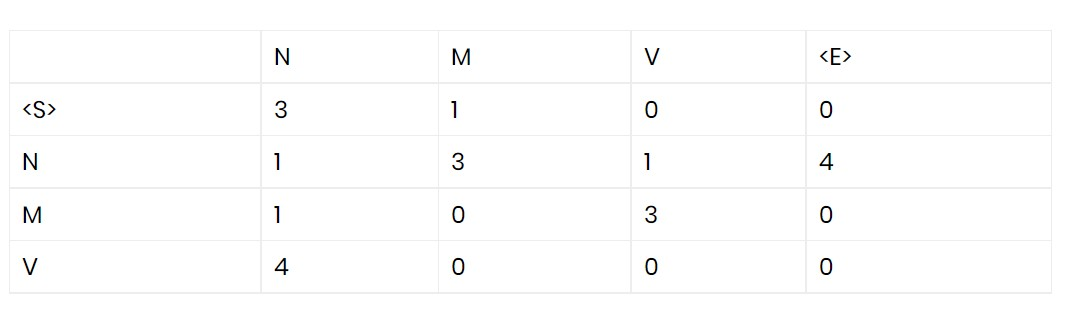
In the above figure, we can see that the < S > tag is followed by the N tag three times, thus the first entry is 3.The model tag follows the < S > just once, thus the second entry is 1. In a similar manner, the rest of the table is filled.

Next, we divide each term in a row of the table by the total number of co-occurrences of the tag in consideration, for example, The Model tag is followed by any other tags four times (in total) as shown below, thus we divide each element in the third row by four.
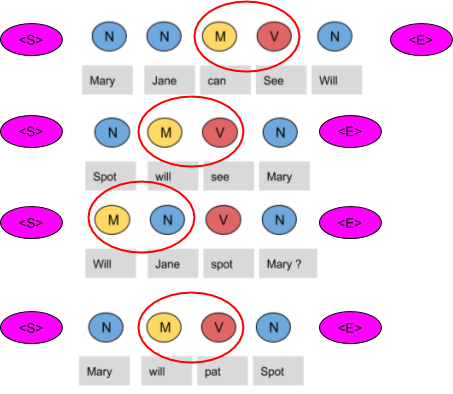
the table is refined as below:

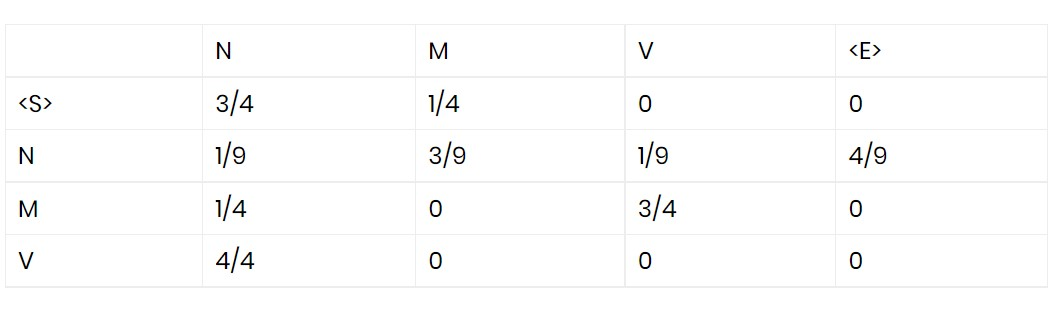
These are the respective transition probabilities for the above four sentences.

CONCLUSION : in this way all probabilities are calculated. now when a new sentence is given, all the words of sentence are mapped with all 81 parts of speech and probabilities of all these combinations are calculated. and if probability > 0, tags are considered to be correctly tagged else those are considered to be incorrectly tagged. but it will be time consuming if sentences are large.


